# Graph eigenvectors

In [1]:
import networkx as nx

import numpy as np
import time
from scipy.linalg import expm, eig

import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 3

In [2]:
N = 60
mean_deg = 8

num_groups = 4; nodes_per_group = N//num_groups; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.523333 - out 0.003333
Mean degree 7.833333333333333


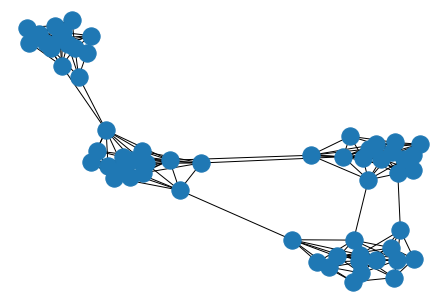

In [3]:
nx.draw(G_gn)

In [4]:
A = nx.to_numpy_array(G_gn)
L = np.eye(N) - A / np.sum(A,axis=0)[:,None]

In [5]:
eigvals, eigvecs = eig(-L) # eigenvectors = columns

# Sort
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

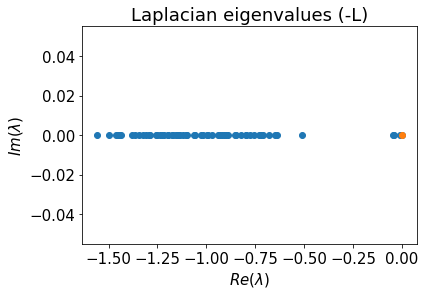

In [10]:
plt.scatter(eigvals.real, eigvals.imag)
plt.scatter(eigvals[0].real, eigvals[0].imag)
#plt.scatter(eigvals[1].real, eigvals[1].imag)

plt.xlabel(r'$Re(\lambda)$')
plt.ylabel(r'$Im(\lambda)$')
plt.title('Laplacian eigenvalues (-L)')
#plt.grid()

plt.show()

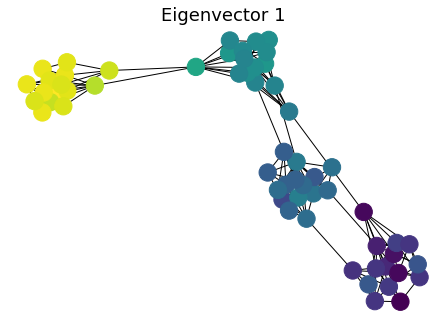

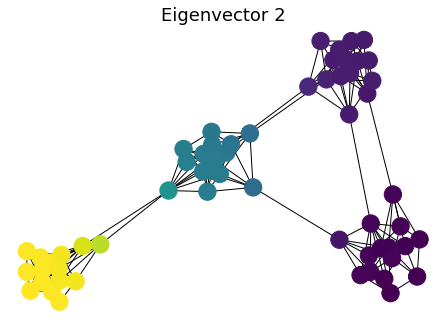

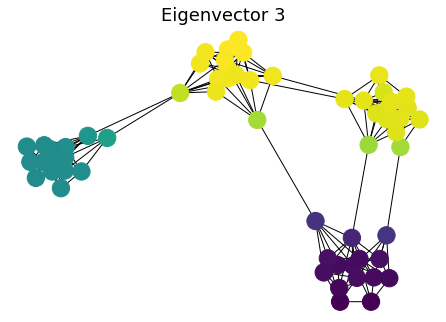

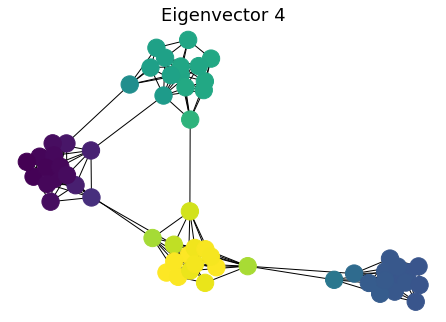

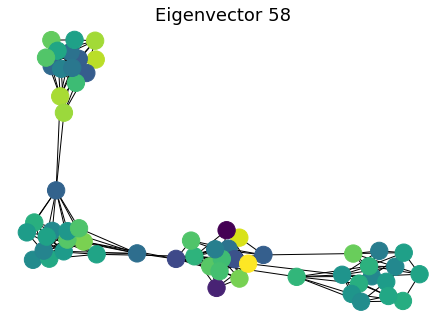

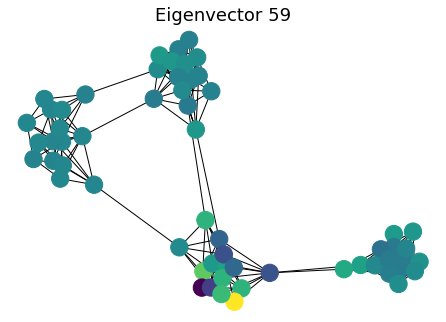

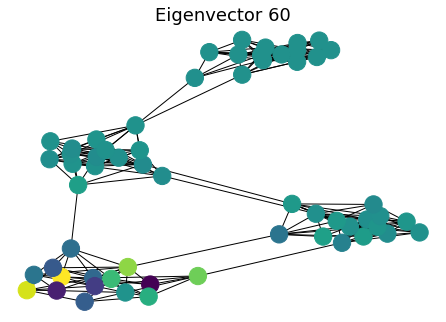

In [11]:
tt = [0, 1, 2, 3, N-3, N-2, N-1]

for t in tt:
    plt.figure()
    nx.draw(G_gn, node_color=eigvecs[:,t])
    plt.title('Eigenvector '+str(t+1))
    plt.show()